## notebook 04: quantifying condition and individuality effect

We quantify the effect from zero to three objetcs, and separately from three to 99 objects, by plotting the differences in median individual position errors.

In [4]:
# importing python packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import scipy.stats as stats
import seaborn as sns
# importing modules from our analysis pipeline
from utilities import helpers

In [5]:
# set data path and save path
data_root = f"..{os.sep}data{os.sep}"
save_path = f"..{os.sep}figures{os.sep}"

In [6]:
# load difference results form R notebook (nb_03a_linear_regression_modelling_accuracy)
diffs = pd.read_csv(data_root + "diffs.csv", index_col=0)
diffs_df = diffs.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df = diffs_df.rename(columns={"unique.data.ppid.": "ppid"})

In [7]:
# load difference and slope results form R notebook (nb_03p_linear_regression_modelling_precision)
diffs_sd = pd.read_csv(data_root + "sd_diffs.csv", index_col=0)
diffs_df_sd = diffs_sd.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df_sd = diffs_df_sd.rename(columns={"unique.data.ppid.": "ppid"})

## Figure 6

We plot kernel density functions and boxplots for the difference from zero to three, and separately from three to 99 objects for the accuracy and precision of the position error. From comparing the two distributions we learn, that from zero to three objects the median position error decreases, while from three to 99 objects we find a high peak at around zero, indicating no considerable change in position error and multiple outliers on the right side, indicating considerable increase in position error for some participants. A similar result is valid for the precision measure of std of the position error, whereby the peak from three to 99 objects lies slightly higher at around 2. 

In [8]:
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
performance_dict = performance["performance_dict"]
ppid_colormap = performance["colormap"]
# use performance dictionary to make a column "performance_score" that holds for each datapoint 
# ...the performance in forest condition
performance_score = [performance_dict[ppid] for ppid in diffs_df.ppid]
diffs_df["performance_score"] = performance_score
diffs_df_sd["performance_score"] = performance_score

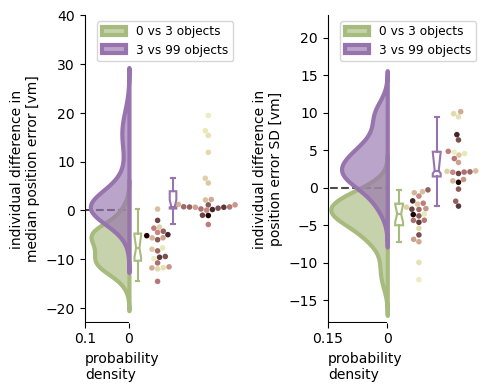

In [9]:
fig, axs = plt.subplots(1,2)

####################################################################################################
########################################## ACCURACY ################################################
####################################################################################################

sns.kdeplot(y=diffs_df.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0])
sns.kdeplot(y=diffs_df.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0])

axs[0].boxplot(diffs_df.diff_0to3, positions=[-0.02], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="#a8bb7e", markeredgecolor="#a8bb7e"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000,
            )
axs[0].boxplot(diffs_df.diff_3to99, positions=[-0.1], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="#9774ad", markeredgecolor="None"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000,
            )

x_pos = -0.065
diffs_df["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df, ax=axs[0], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.18
diffs_df["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df, ax=axs[0], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[0].hlines(xmin=0.1, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[0].set_xlim([-0.25, 0.1])
axs[0].set_ylim([-23, 40])
axs[0].set_ylabel("individual difference in\nmedian position error [vm]")
axs[0].set_xlabel("probability\ndensity", loc="left")
axs[0].invert_xaxis()
axs[0].set_xticks([0, 0.1])
axs[0].set_xticklabels([0, 0.1])
axs[0].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[0].spines[['right', 'top', 'bottom']].set_visible(False)
axs[0].hlines(xmin=0, xmax=0.1, y=-23, color="black")

####################################################################################################
########################################## PRECISION ###############################################
####################################################################################################

sns.kdeplot(y=diffs_df_sd.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1])
sns.kdeplot(y=diffs_df_sd.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1])

axs[1].boxplot(diffs_df_sd.diff_0to3, positions=[-0.03], vert=True, widths=[0.02], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000,
            )
axs[1].boxplot(diffs_df_sd.diff_3to99, positions=[-0.125], vert=True, widths=[0.02], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="#9774ad", markeredgecolor="None"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000,
            )

x_pos = -0.08
diffs_df_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df_sd, ax=axs[1], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.18
diffs_df_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df_sd, ax=axs[1], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[1].hlines(xmin=0.2, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[1].set_xlim([-0.24, 0.15])
axs[1].set_ylim([-18, 23])
axs[1].set_ylabel("individual difference in\nposition error SD [vm]")
axs[1].set_xlabel("probability\ndensity", loc="left")
axs[1].invert_xaxis()
axs[1].set_xticks([0, 0.15])
axs[1].set_xticklabels([0, 0.15])
axs[1].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[1].spines[['right', 'top', 'bottom']].set_visible(False)
axs[1].hlines(xmin=0, xmax=0.15, y=-18, color="black")

####################################################################################################
fig.set_size_inches(5,4)
fig.tight_layout(pad=1.0)
filename = "figure_6"
fig.savefig(save_path + filename + ".png")
fig.savefig(save_path + filename + ".svg")
fig.savefig(save_path + filename + ".pdf")
fig.savefig(save_path + filename + ".tiff")

### separating participants into a share for which accuracy stays mostly unchanged and another share for which it increases

#### participants outside confidence interval

Seven out of 23 participants, show a performance decline in accuracy between three and 99 objects outside the bootstrapped 95\% confidence interval and thus fall into the group of people negatively impacted by the high degree of spatial clutter.

In [10]:
bootstrap_res = stats.bootstrap((diffs_df.diff_3to99,), np.median, n_resamples=1000000)
diffs_df.query(f"diff_3to99 > {bootstrap_res.confidence_interval.high}")

ppid  diff_0to3  diff_3to99  performance_score  x_pos
1   MM04_PU01 -11.767410   15.359305                 21  -0.18
5   MM04_PU06  -3.429556    6.585550                 19  -0.18
6   MM04_PU07 -11.993799   11.905389                 20  -0.18
8   MM04_PU09 -11.803062    2.225527                 15  -0.18
13  MM04_PU14  -7.976461    5.612784                 18  -0.18
17  MM04_PU18  -7.688412   16.339085                 22  -0.18
19  MM04_PU21  -9.895545   19.446722                 23  -0.18

#### particpants that are better with 99 objects

Conversely, three other participants even perform slightly better with 99 objects than with three.

In [11]:
diffs_df.query("diff_3to99 < 0")

ppid  diff_0to3  diff_3to99  performance_score  x_pos
2   MM04_PU03  -3.646994   -2.898702                 11  -0.18
12  MM04_PU13  -2.057662   -0.999984                  4  -0.18
16  MM04_PU17  -5.194523   -1.058519                  1  -0.18

#### Wilcoxon ranksum test on single trial basis for significant changes in performance between three and 99 objects
11 participants get sign. worse (all p$<$0.04, -2.88$<$d$<$-0.65)

3 particiapnts get sign. better (all p$<$0.016, 0.05$<$d$<$0.23)

10 participants are insignificant

In [12]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

In [13]:
# read in experiment result dataframe
experiment_results = pd.read_csv(data_root + "processed_data.csv")
experiment_results.head()

session_num  block_num    trial_name  line_i   experiment       ppid  \
0            1          1  99_obj_right       0  MM04_PU01_2  MM04_PU01   
1            1          1   2_obj_right       1  MM04_PU01_2  MM04_PU01   
2            1          1   3_obj_right       2  MM04_PU01_2  MM04_PU01   
3            1          1  10_obj_right       3  MM04_PU01_2  MM04_PU01   
4            1          1   2_obj_right       4  MM04_PU01_2  MM04_PU01   

   trial_num  trial_num_in_block  start_time  end_time  ... goalEstimateZ  \
0          1                   1    1007.957  1069.763  ...      2.708552   
1          2                   2    1069.763  1143.276  ...     -0.698157   
2          3                   3    1143.276  1206.921  ...      2.127848   
3          4                   4    1206.921  1276.941  ...     -4.614375   
4          5                   5    1276.941  1352.005  ...     -1.345040   

  goalTrueX  goalTrueY  goalTrueZ  confidence  flagged  num_objects  \
0       0.0        0.0        0.0    0.043412    False           99   
1       0.0        0.0        0.0    0.262324    False            2   
2       0.0        0.0        0.0    0.214372    False            3   
3       0.0        0.0        0.0    0.291512    False           10   
4       0.0        0.0        0.0    0.235219    False            2   

   err_pos_walk  err_dist_walk  err_dir_walk  
0      2.708553      -2.708552      0.004725  
1      9.236702       2.298801    -19.717797  
2      8.713744      -0.616872    -20.276377  
3      4.695786       4.627169      1.683901  
4      7.918898       2.476553    -16.500153  

[5 rows x 28 columns]

In [14]:
from scipy.stats import ranksums as ranksums
ps = []
ds = []
worses = []
for ppid in np.unique(experiment_results.ppid):

    three = experiment_results.query(f"ppid == '{ppid}' & num_objects == 3").err_pos_walk
    ninenine = experiment_results.query(f"ppid == '{ppid}' & num_objects == 99").err_pos_walk
    ps += [ranksums(three, ninenine).pvalue]
    ds += [cohen_d(three, ninenine)]
    worse = False
    if np.median(three) < np.median(ninenine):
        worse = True
    worses += [worse]
    
p = pd.DataFrame()
p["ppid"] = np.unique(experiment_results.ppid)
p["p"] = ps
p["worse"] = worses
p["d"] = ds
p

ppid             p  worse         d
0   MM04_PU01  5.338925e-07   True -1.740231
1   MM04_PU03  5.907980e-03  False  0.054430
2   MM04_PU04  1.548069e-01   True -0.446174
3   MM04_PU05  4.563627e-01   True -0.463492
4   MM04_PU06  1.468155e-07   True -2.264147
5   MM04_PU07  1.174280e-08   True -2.038157
6   MM04_PU08  3.222996e-01   True -0.445135
7   MM04_PU09  3.994791e-02   True -1.062837
8   MM04_PU10  1.012823e-01   True  0.048153
9   MM04_PU11  5.799290e-05   True -1.294649
10  MM04_PU12  3.368485e-02   True -0.654251
11  MM04_PU13  2.912512e-03  False  0.183495
12  MM04_PU14  7.765988e-04   True -1.274395
13  MM04_PU15  1.529041e-01   True  0.390001
14  MM04_PU16  8.326452e-02   True -0.453502
15  MM04_PU17  1.614482e-02  False  0.228091
16  MM04_PU18  9.909922e-09   True -2.882245
17  MM04_PU19  7.965859e-02   True -0.615541
18  MM04_PU21  1.307508e-07   True -2.173279
19  MM04_PU22  1.862627e-02   True -0.747149
20  MM04_PU23  9.271793e-02   True -0.538647
21  MM04_PU24  4.261926e-06   True -1.201319
22  MM04_PU25  1.955861e-01   True -0.104451

#### descriptive statistics

The distributions of accuracy changes from zero to three is not significantly different from normal, while the distribution from three to 99 is significantly different from normal

In [15]:
from scipy.stats import shapiro
print("\n0 to 3:\n", shapiro(diffs_df.diff_0to3))
print("\n3 to 99:\n", shapiro(diffs_df.diff_3to99))


0 to 3:
 ShapiroResult(statistic=0.9743993282318115, pvalue=0.7926062941551208)

3 to 99:
 ShapiroResult(statistic=0.7351334095001221, pvalue=4.144196645938791e-05)


The distributions of precision changes from zero to three is significantly different from normal, while the distribution from three to 99 is not significantly different from normal

In [16]:
print("\n0 to 3:\n", shapiro(diffs_df_sd.diff_0to3))
print("\n3 to 99:\n", shapiro(diffs_df_sd.diff_3to99))


0 to 3:
 ShapiroResult(statistic=0.9015176892280579, pvalue=0.027170978486537933)

3 to 99:
 ShapiroResult(statistic=0.9488400816917419, pvalue=0.27680984139442444)


### make Figure 6 but for session 1 and session 4 separately

In [17]:
# load difference results for session 1 from R notebook (nb_03a_linear_regression_modelling_accuracy)
diffs = pd.read_csv(data_root + "diffs_only_session1.csv", index_col=0)
diffs_df1 = diffs.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df1 = diffs_df1.rename(columns={"unique.data.ppid.": "ppid"})

# load difference results for session 4 from R notebook (nb_03a_linear_regression_modelling_accuracy)
diffs = pd.read_csv(data_root + "diffs_only_session4.csv", index_col=0)
diffs_df4 = diffs.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df4 = diffs_df4.rename(columns={"unique.data.ppid.": "ppid"})

# load sd difference results for session 1 from R notebook (nb_03a_linear_regression_modelling_accuracy)
diffs = pd.read_csv(data_root + "sd_diffs_only_session1.csv", index_col=0)
diffs_df1_sd = diffs.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df1_sd = diffs_df1_sd.rename(columns={"unique.data.ppid.": "ppid"})

# load sd difference results for session 4 from R notebook (nb_03a_linear_regression_modelling_accuracy)
diffs = pd.read_csv(data_root + "sd_diffs_only_session4.csv", index_col=0)
diffs_df4_sd = diffs.loc[:, ["unique.data.ppid.","diff_0to3", "diff_3to99"]]
diffs_df4_sd = diffs_df4_sd.rename(columns={"unique.data.ppid.": "ppid"})

diffs_df1["performance_score"] = performance_score
diffs_df1_sd["performance_score"] = performance_score
diffs_df4["performance_score"] = performance_score
diffs_df4_sd["performance_score"] = performance_score

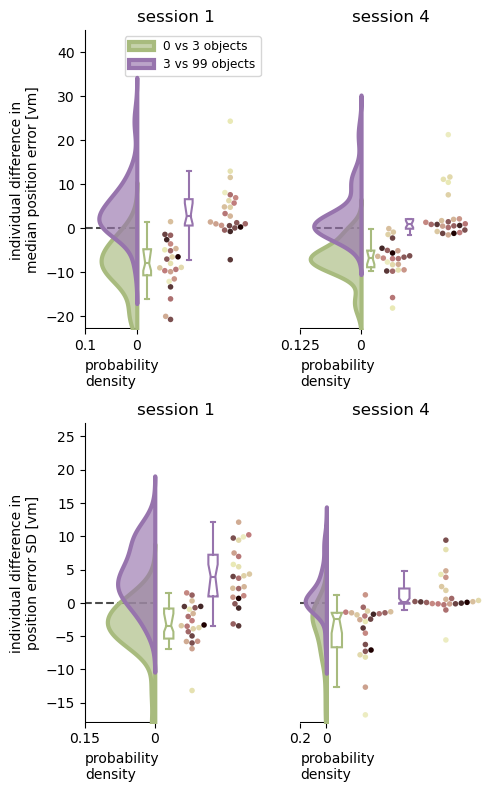

In [18]:
fig, axs = plt.subplots(2,2)

####################################################################################################
########################################## ACCURACY ################################################
####################################################################################################

########################################## SESSION 1 ###############################################
sns.kdeplot(y=diffs_df1.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0,0])
sns.kdeplot(y=diffs_df1.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0,0])

axs[0,0].boxplot(diffs_df1.diff_0to3, positions=[-0.02], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000,                 
            )
axs[0,0].boxplot(diffs_df1.diff_3to99, positions=[-0.1], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )

x_pos = -0.065
diffs_df1["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df1, ax=axs[0,0], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.18
diffs_df1["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df1, ax=axs[0,0], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[0,0].hlines(xmin=0.1, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[0,0].set_xlim([-0.25, 0.1])
axs[0,0].set_ylim([-23, 45])
axs[0,0].set_ylabel("individual difference in\nmedian position error [vm]")
axs[0,0].set_xlabel("probability\ndensity", loc="left")
axs[0,0].invert_xaxis()
axs[0,0].set_xticks([0, 0.1])
axs[0,0].set_xticklabels([0, 0.1])
axs[0,0].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[0,0].spines[['right', 'top', 'bottom']].set_visible(False)
axs[0,0].hlines(xmin=0, xmax=0.1, y=-23, color="black")

axs[0,0].set_title("session 1")

########################################## SESSION 4 ###############################################
sns.kdeplot(y=diffs_df4.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0,1])
sns.kdeplot(y=diffs_df4.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[0,1])

axs[0,1].boxplot(diffs_df4.diff_0to3, positions=[-0.02], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )
axs[0,1].boxplot(diffs_df4.diff_3to99, positions=[-0.1], vert=True, widths=[0.015], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )

x_pos = -0.065
diffs_df4["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df4, ax=axs[0,1], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.18
diffs_df4["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df4, ax=axs[0,1], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[0,1].hlines(xmin=0.1, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[0,1].set_xlim([-0.25, 0.1])
axs[0,1].set_ylim([-23, 45])
axs[0,1].set_xlabel("probability\ndensity", loc="left")
axs[0,1].invert_xaxis()
axs[0,1].set_xticks([0, 0.125])
axs[0,1].set_xticklabels([0, 0.125])
axs[0,1].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[0,1].legend().remove()
axs[0,1].spines[['right', 'top', 'bottom', "left"]].set_visible(False)
axs[0,1].hlines(xmin=0, xmax=0.125, y=-23, color="black")
axs[0,1].axes.get_yaxis().set_visible(False)

axs[0,1].set_title("session 4")

####################################################################################################
########################################## PRECISION ###############################################
####################################################################################################

########################################## SESSION 1 ###############################################
sns.kdeplot(y=diffs_df1_sd.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1,0])
sns.kdeplot(y=diffs_df1_sd.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1,0])

axs[1,0].boxplot(diffs_df1_sd.diff_0to3, positions=[-0.03], vert=True, widths=[0.02], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )
axs[1,0].boxplot(diffs_df1_sd.diff_3to99, positions=[-0.125], vert=True, widths=[0.02], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )

x_pos = -0.08
diffs_df1_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df1_sd, ax=axs[1,0], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.18
diffs_df1_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df1_sd, ax=axs[1,0], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[1,0].hlines(xmin=0.2, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[1,0].set_xlim([-0.24, 0.15])
axs[1,0].set_ylim([-18, 27])
axs[1,0].set_ylabel("individual difference in\nposition error SD [vm]")
axs[1,0].set_xlabel("probability\ndensity", loc="left")
axs[1,0].invert_xaxis()
axs[1,0].set_xticks([0, 0.15])
axs[1,0].set_xticklabels([0, 0.15])
axs[1,0].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[1,0].legend().remove()
axs[1,0].spines[['right', 'top', 'bottom']].set_visible(False)
axs[1,0].hlines(xmin=0, xmax=0.15, y=-18, color="black")
axs[1,0].set_title("session 1")

########################################## SESSION 4 ###############################################
sns.kdeplot(y=diffs_df4_sd.diff_0to3, color="#a8bb7e", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1,1])
sns.kdeplot(y=diffs_df4_sd.diff_3to99, color="#9774ad", fill=True, alpha=0.65, linewidth=3, zorder=100, ax=axs[1,1])

axs[1,1].boxplot(diffs_df4_sd.diff_0to3, positions=[-0.08], vert=True, widths=[0.08], patch_artist=True,
            boxprops=dict(facecolor="None", color="#a8bb7e", linewidth=1.5),
            capprops=dict(color="#a8bb7e", linewidth=1.5),
            whiskerprops=dict(color="#a8bb7e", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#a8bb7e", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )
axs[1,1].boxplot(diffs_df4_sd.diff_3to99, positions=[-0.6], vert=True, widths=[0.08], patch_artist=True,
            boxprops=dict(facecolor="None", color="#9774ad", linewidth=1.5),
            capprops=dict(color="#9774ad", linewidth=1.5),
            whiskerprops=dict(color="#9774ad", linewidth=1.5),
            flierprops=dict(color="white", markeredgecolor="white"),
            medianprops=dict(color="#9774ad", linewidth=1.5),
            zorder=100,
            notch=True,
            bootstrap=10000, 
            )

x_pos = -0.3
diffs_df4_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df4_sd, ax=axs[1,1], y="diff_0to3", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)
x_pos = -0.92
diffs_df4_sd["x_pos"] = np.repeat(x_pos, len(diffs_df))
sns.swarmplot(data=diffs_df4_sd, ax=axs[1,1], y="diff_3to99", x="x_pos", hue="performance_score", palette=sns.color_palette(ppid_colormap), size=4, native_scale=True)

axs[1,1].hlines(xmin=0.2, xmax=0, y=0, color="black", alpha=0.7, zorder=1, linestyle="dashed")
axs[1,1].set_xlim([-1.2, 0.15])
axs[1,1].set_ylim([-18, 27])
axs[1,1].set_ylabel("individual difference in\nposition error SD")
axs[1,1].set_xlabel("probability\ndensity", loc="left")
axs[1,1].invert_xaxis()
axs[1,1].set_xticks([0, 0.2])
axs[1,1].set_xticklabels([0, 0.2])
axs[1,1].legend(["0 vs 3 objects", "3 vs 99 objects"], fontsize=8.75)
axs[1,1].legend().remove()
axs[1,1].spines[['right', 'top', 'bottom', "left"]].set_visible(False)
axs[1,1].hlines(xmin=0, xmax=0.2, y=-18, color="black")
axs[1,1].axes.get_yaxis().set_visible(False)
axs[1,1].set_title("session 4")

####################################################################################################
fig.set_size_inches(5,8)
fig.tight_layout(pad=1.0)
filename = "figure_S3"
fig.savefig(save_path + filename + ".png")
fig.savefig(save_path + filename + ".svg")
fig.savefig(save_path + filename + ".pdf")
fig.savefig(save_path + filename + ".tiff")

#### wilcoxon signed-rank test (non-parametric paired test)

In [19]:
print("accuracy:")
wil = stats.wilcoxon(diffs_df1.diff_0to3, diffs_df4.diff_0to3)
d = cohen_d(diffs_df1.diff_0to3, diffs_df4.diff_0to3)
print(f"0 vs 3 objects for session 1 vs session 4: Z={np.round(wil.statistic,2)}, p={np.round(wil.pvalue,4)}, d={np.round(d,4)}")
wil = stats.wilcoxon(diffs_df1.diff_3to99, diffs_df4.diff_3to99)
d = cohen_d(diffs_df1.diff_3to99, diffs_df4.diff_3to99)
print(f"3 vs 99 objects for session 1 vs session 4: Z={np.round(wil.statistic,2)}, p={np.round(wil.pvalue,4)}, d={np.round(d,4)}")

print("precision:")
wil = stats.wilcoxon(diffs_df1_sd.diff_0to3, diffs_df4_sd.diff_0to3)
d = cohen_d(diffs_df1_sd.diff_0to3, diffs_df4_sd.diff_0to3)
print(f"0 vs 3 objects for session 1 vs session 4: Z={np.round(wil.statistic,2)}, p={np.round(wil.pvalue,4)}, d={np.round(d,4)}")
wil = stats.wilcoxon(diffs_df1_sd.diff_3to99, diffs_df4_sd.diff_3to99)
d = cohen_d(diffs_df1_sd.diff_3to99, diffs_df4_sd.diff_3to99)
print(f"3 vs 99 objects for session 1 vs session 4: Z={np.round(wil.statistic,2)}, p={np.round(wil.pvalue,4)}, d={np.round(d,4)}")

accuracy:
0 vs 3 objects for session 1 vs session 4: Z=107.0, p=0.3604, d=-0.2592
3 vs 99 objects for session 1 vs session 4: Z=95.0, p=0.2002, d=0.2038
precision:
0 vs 3 objects for session 1 vs session 4: Z=129.0, p=0.7998, d=0.054
3 vs 99 objects for session 1 vs session 4: Z=60.0, p=0.0163, d=0.7552


we conclude that participants do not change their general behaviour from session 1 to session 4 and that the session order effect is negelctable